In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
import glob

In [3]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
# to_remove = ['pernah']
stopwords = factory.get_stop_words()
# stopword = factory.create_stop_word_remover()
#-- opsional ya
# stopwords.remove('tidak')
newstopwords = ['ormas', 'ikut', 'apapun', 'bergabung', 'mengikuti', 'tergabung']
stopwords = stopwords + newstopwords

In [12]:
df = pd.read_csv('D:/Works/Inovastek/HANDOVER FARHAN/HANDOVER FARHAN/ANALISIS SENTIMEN/Satu Paket/G20-Cleansing.csv')

In [13]:
df.columns.values.tolist()

['Unnamed: 0',
 'created_at',
 'id',
 'id_str',
 'tweet',
 'truncated',
 'display_text_range',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'lang',
 'quoted_status_id',
 'quoted_status_id_str',
 'text',
 'favorited_by',
 'scopes',
 'display_text_width',
 'retweeted_status',
 'quoted_status_permalink',
 'quote_count',
 'timestamp_ms',
 'reply_count',
 'filter_level',
 'query',
 'withheld_scope',
 'withheld_copyright',
 'withheld_in_countries',
 'possibly_sensitive_appealable']

In [14]:
dead_list = ['tau','tahu','-','"','belum ada','biasa','biasa saja','tidak ada','sudah benar', 'pemilu']

def word_eli(string):
    res = [ele for ele in dead_list if(ele in string)]
    if len(res)>0:
        return np.nan
    else:
        return string
    
df['tweet'] = [word_eli(i) for i in df['tweet']]
#df = df.dropna()

In [20]:
df['cek'] = str(df['tweet'])

<function matplotlib.pyplot.show(close=None, block=None)>

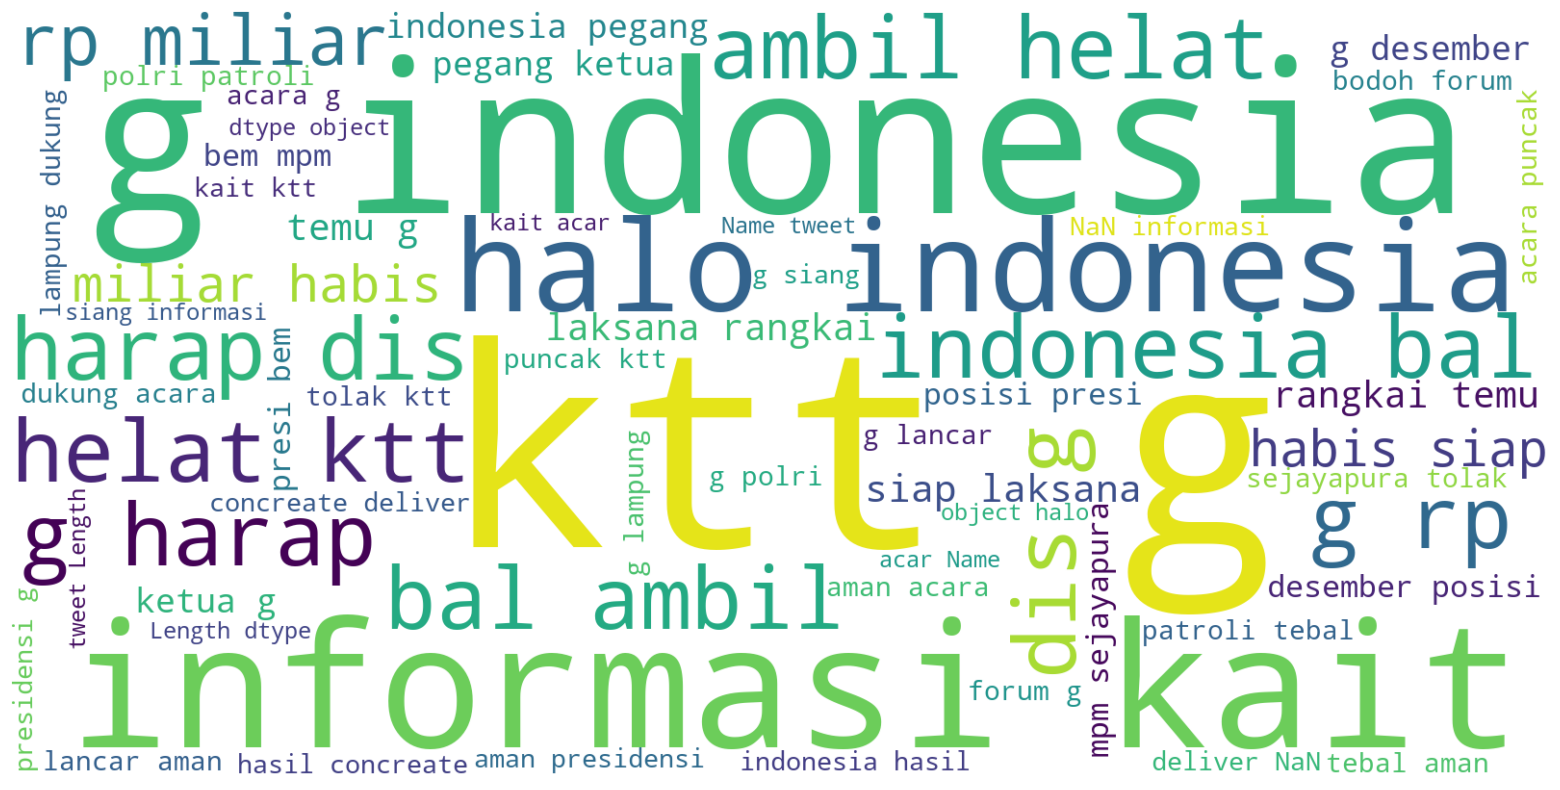

In [22]:
all_words_p = ' '.join(word for word in df["cek"])
wordcloud = WordCloud(width=1600, height=800, mode='RGBA', background_color='white').generate(all_words_p)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show